# Breast Cancer prediction
- Goal: to predict breast cancer based on 11 features desribing characteristics of the cell
- Wisconsin Diagnostic Breast Cancer (WDBC): 11 features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass
- original paper documented 97% accuracy with a multisurface method-tree
- Kumari and Singh (2018) reported KNN yielded the highest accuracy when compared with linear regression & SVM (https://reader.elsevier.com/reader/sd/pii/S1877050918309323?token=BF4DA2D178F34AB13A1E31B04AB8618B8737D4D7B76D92896E0E7F0B449F33949DD479D0DB696B5BD25F60123E9BE4D8)

NB. other reading materials
https://www.hindawi.com/journals/jhe/2019/4253641/#results 
https://iopscience.iop.org/article/10.1088/1757-899X/495/1/012033/pdf
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4452509/ - uses ICA instead of PCA 

NB. NHS currently uses the Cox proportional hazards regression model to predict breast cancer (https://breast.predict.nhs.uk/about/technical/technical)

## Initialisation

In [147]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [148]:
# to display multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [149]:
# Import data
df = pd.read_csv("data.csv")

## Overview of the data

In [150]:
print("Data shape: " + str(df.shape))
df.info()

Data shape: (569, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  peri

In [151]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [152]:
df.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


### Observations
- class label (y) = diagnosis
- all features seem to be have correct data type 
- no missing/null values

### To do
- the  first (ID which cannot be used for classification) & last column (unnamed: 32) can be removed
- one-hot encode diagnosis for modelling
- potentially linearity/redundancy in features (ex. mean, SEM, worst for the same features) - PCA to reduce dimensionality? 


## Pre-processing

In [153]:
# remove meaningless variables
df = df.drop(['id'], axis=1)
df = df.drop(['Unnamed: 32'], axis=1)

## Data exploration and visualisation

Number of Benign:  357   62.7 %
Number of Malignant:  212   37.3 %


Text(0.5, 1.0, 'Number of Malignant vs Benign Tumours')

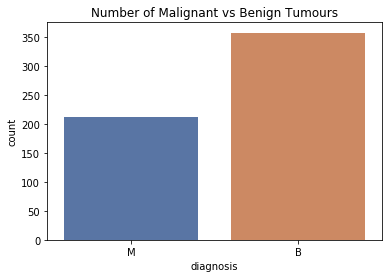

In [154]:
# Benign vs Malignant ratio
B_counts, M_counts = df['diagnosis'].value_counts()
B_percent, M_percent = (df['diagnosis'].value_counts(normalize=True))*100

print('Number of Benign: ', B_counts, ' ', round(B_percent,1), '%')
print('Number of Malignant: ',M_counts, ' ', round(M_percent,1), '%')

ax = sns.countplot(x='diagnosis', data=df, palette='deep')
plt.title('Number of Malignant vs Benign Tumours')

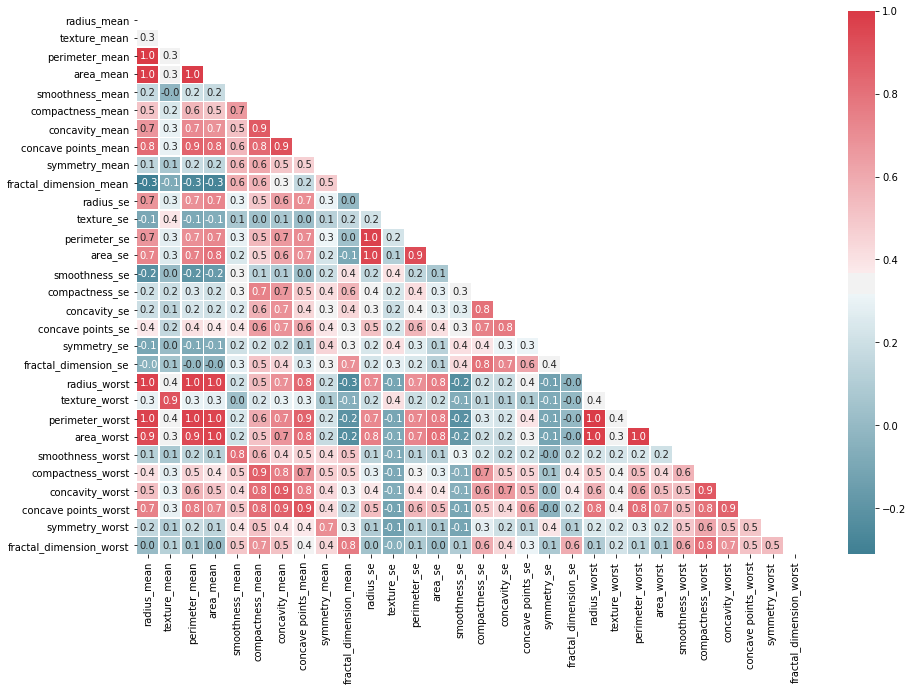

In [155]:
# Build a simpler and less saturated correlation matrix
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#correlation map
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(), mask=mask, cmap=cmap, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [156]:
# Box plot
features_mean = df.columns[1:11] 
features_se = df.columns[11:21]
features_worst = df.columns[21:31]

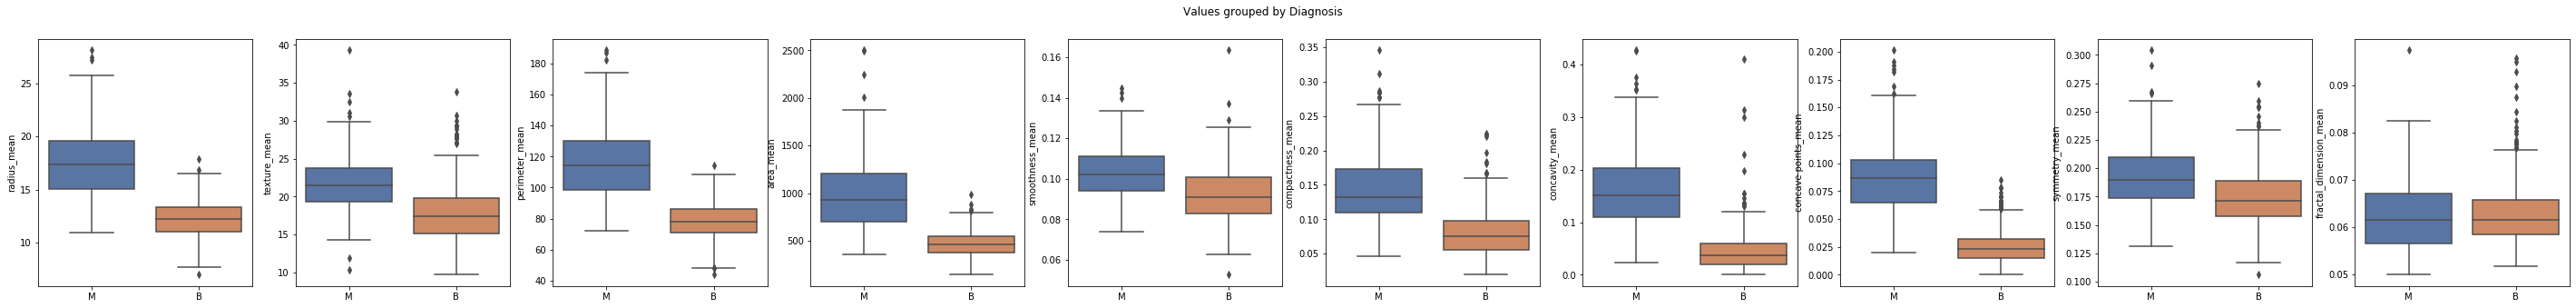

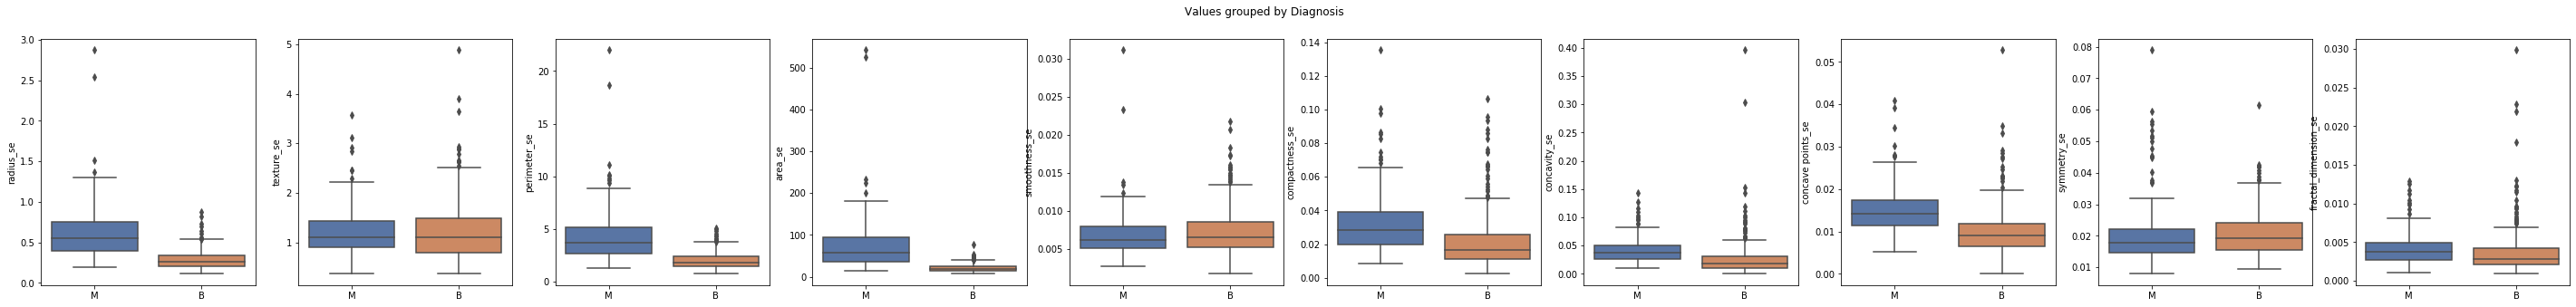

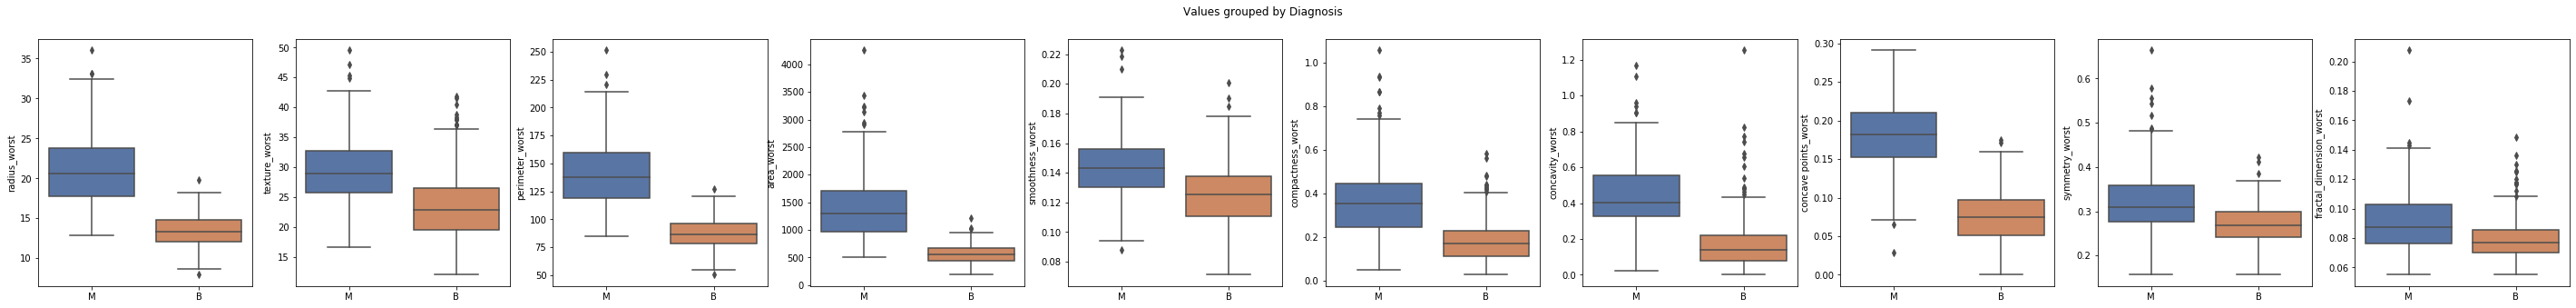

In [157]:
def boxplot_features(features_list):
    f,axis = plt.subplots(1,10,figsize = (50,5))
    f.suptitle('Values grouped by Diagnosis')
    for i, feature in enumerate(features_list,1):
        boxplot = sns.boxplot(x='diagnosis', y=feature, data=df,ax=axis[i-1], palette='deep').set(xlabel='')

boxplot_features(features_mean)
boxplot_features(features_se)
boxplot_features(features_worst)

- seems like malignant tumours tend to have higher values for most features
- particularly true for features like radius, perimeter, area & concavity: makes sense as they are mathematically related to each other and also explains the high correlation in the heatmap above

- other plots
> scatter plots to show co-linearity between radius & area etc?
> group mean & worst values together?


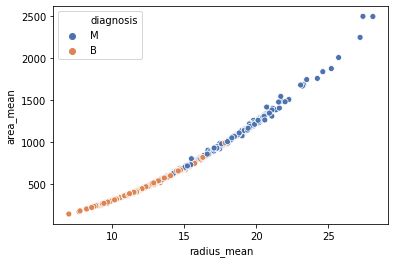

In [158]:
feature1 = 'radius_mean'
feature2 = 'area_mean'

sns.scatterplot(x=feature1, y=feature2, data=df, hue='diagnosis', palette='deep')

## Feature engineering & selection

In [159]:
X = df.drop('diagnosis', axis = 1)

df.loc[df['diagnosis'] == 'B', 'diagnosis'] = 0
df.loc[df['diagnosis'] == 'M', 'diagnosis'] = 1
df['diagnosis'] = df['diagnosis'].astype(int)
y = df['diagnosis']

## To do
- PCA: need to normalise
- modelling - classifier (categorical & supervised)
    - 1) logistic regression
    - 2) decision tree/random forest
    - 3) others: SVC/KNN